# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement

To identify the most relevant features from the Ames Housing Dataset and create a regression model that will most accurately generate predictions of the sales price of each house. Thereafter, submit predictions for test dataset to Kaggle to see how the model does against unknown data and make recommendations on how to improve the house value.

## Executive Summary

This report aims to build a regression model to predict the sale price of the house. Selected features from train dataset were fit into the models and via cross validation, their root mean square errors (rmse) were compared. The score with the lowest rmse was used to make prediction of the house price.

Several data visualisation like histograms, regplot, box plot, pair plots and count plot were plotted to understand the data better, show trends and outliers. 

Feature engineering, creation of dummies variables were rendered to generate features to fit into the model.

Four types of regression models - linear, ridge, lasso and elastic were tested and cross validated.

Provide recommendations for which features are better than the other at improving the house value.

### Contents:
- [Data Import and Cleaning for train](#Data-Import-and-Cleaning-for-train)
- [Data Import and Cleaning for test](#Data-Import-and-Cleaning-for-test)
- [Exploratory Data Analysis and Cleaning](#Exploratory-Data-Analysis-and-Cleaning)
- [Generating X, y and train test split](#Generating-X,-y-and-train-test-split)
- [Model on train set](#Model-on-train-set)
- [Model on validation set](#Model-on-validation-set)
- [Retrain full train dataset on Lasso Regression](#Retrain-full-train-dataset-on-Lasso-Regression)
- [Predict on test dataset using Lasso Regression](#Predict-on-test-dataset-using-Lasso-Regression)
- [Conclusions](#Conclusions)
- [Recommendations](#Recommendations)

### Data Dictionary:
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**Id**|*integer*|train/test|Id of each house| 
|**PID**|*integer*|train/test|Parcel identification number - can be used with city web site for parcel review|
|**MS Subclass**|*integer*|train/test|Identifies the type of dwelling involed in the sale| 
|**MS Zoning**|*object*|train/test|Identifies the general zoning classification of the sale| 
|**Lot Frontage**|*float*|train/test|Linear feet of street connected to property| 
|**Lot Area**|*object*|train/test|Lot size in square feet| 
|**Street**|*object*|train/test|Type of road access to property| 
|**Alley**|*object*|train/test|Type of alley access to property| 
|**Lot Shape**|*object*|train/test|General shape of property| 
|**Land Contour**|*object*|train/test|Flatness of the property| 
|**Utilities**|*object*|train/test|Type of utilities available| 
|**Lot Config**|*object*|train/test|Lot configuration| 
|**Land Slope**|*object*|train/test|Slope of property| 
|**Neighbourhood**|*object*|train/test|Physical locations within Ames city limits| 
|**Condition 1**|*object*|train/test|Proximity to various conditions| 
|**Condition 2**|*object*|train/test|Proximity to various conditions (for second condition)| 
|**Bldg Type**|*object*|train/test|Type of dwelling| 
|**House Style**|*object*|train/test|Style of dwelling| 
|**Overall Qual**|*integer*|train/test|Rates the overall materials and finish of the house| 
|**Overall Cond**|*integer*|train/test|Rates the overall condition of the house| 
|**Year Built**|*integer*|train/test|Original construction date| 
|**Year Remod/Add**|*integer*|train/test|Remodel date (same as construction date if there is no remodeling or additions| 
|**Roof Style**|*object*|train/test|Type of roof| 
|**Roof Matl**|*object*|train/test|Roof material| 
|**Exterior 1st**|*object*|train/test|Exterior covering on house| 
|**Exterior 2nd**|*object*|train/test|Exterior covering on house (if there is a second material|
|**Mas Vnr Type**|*object*|train/test|Masonry veneer type| 
|**Mas Vnr Area**|*float*|train/test|Masonry veneer area in square feet| 
|**Exter Qual**|*object*|train/test|Evaluates the quality of the material on the exterior| 
|**Exter Cond**|*object*|train/test|Evaluates the present condition of the material on the exterior|
|**Foundation**|*object*|train/test|Type of foundation| 
|**Bsmt Qual**|*object*|train/test|Evaluates the height of the basement| 
|**Bsmt Cond**|*object*|train/test|Evaluates the general condition of the basement| 
|**Bsmt Exposure**|*object*|train/test|Refers to walkout or garden level walls|
|**BsmtFin Type 1**|*object*|train/test|Rating of basement finished area|
|**BsmtFin SF 1**|*float*|train/test|Type 1 finished square feet| 
|**BsmtFin Type 2**|*object*|train/test|Rating of basement finished area (if multiple types)| 
|**BsmtFin SF 2**|*float*|train/test|Type 2 finished square feet| 
|**Bsmt Unf SF**|*float*|train/test|Unfinished square feet of basement area| 
|**Total Bsmt SF**|*float*|train/test|Total square feet of basement area| 
|**Heating**|*object*|train/test|Type of heating| 
|**HeatingQC**|*object*|train/test|Heating quality and condition| 
|**Central Air**|*object*|train/test|Central air conditioning| 
|**Electrical**|*object*|train/test|Electrical system| 
|**1st Flr SF**|*integer*|train/test|First floor square feet| 
|**2nd Flr SF**|*integer*|train/test|Second floor square feet| 
|**Low Qual Fin SF**|*integer*|train/test|Low quality finished square feet (all floors)| 
|**Gr Liv Area**|*integer*|train/test|Above grade (ground) living area square feet| 
|**Bsmt Full Bath**|*float*|train/test|Basement full bathrooms|
|**Bsmt Half Bath**|*float*|train/test|Basement half bathrooms|
|**Full Bath**|*integer*|train/test|Full bathrooms above grade| 
|**Half Bath**|*integer*|train/test|Half baths above grade|
|**Bedroom AbvGr**|*integer*|train/test|Bedrooms above grade (does not include basement bedrooms)|
|**Kitchen AbvGr**|*integer*|train/test|Kitchens above grade|
|**KitchenQual**|*object*|train/test|Kitchen quality|
|**TotRms AbvGrd**|*integer*|train/test|Total rooms above grade (does not include bathrooms)|
|**Functional**|*object*|train/test|Home functionality (assume typical unless deductions are warranted)|
|**Fireplaces**|*integer*|train/test|Number of fireplaces|
|**Fireplace Qu**|*object*|train/test|Fireplace quality|
|**Garage Type**|*object*|train/test|Garage location| 
|**Garage Yr Blt**|*float*|train/test|Years garage was built| 
|**Garage Finish**|*object*|train/test|Interior finish of the garage| 
|**Garage Cars**|*float*|train/test|Size of garage in car capacity| 
|**Garage Area**|*float*|train/test|Size of garage in square feet| 
|**Garage Qual**|*object*|train/test|Garage quality| 
|**Garage Cond**|*object*|train/test|Garage condition| 
|**Paved Drive**|*object*|train/test|Paved driveway| 
|**Wood Deck SF**|*integer*|train/test|Wood deck area in square feet| 
|**Open Porch SF**|*integer*|train/test|Open porch area in square feet| 
|**Enclosed Porch**|*integer*|train/test|Enclosed porch area in square feet| 
|**3Ssn Porch**|*integer*|train/test|Three season porch area in square feet| 
|**Screen Porch**|*integer*|train/test|Screen porch area in square feet| 
|**Pool Area**|*integer*|train/test|Pool area in square feet| 
|**Pool QC**|*object*|train/test|Pool quality| 
|**Fence**|*object*|train/test|Fence quality| 
|**Misc Feature**|*object*|train/test|Miscellaneous feature not covered in other categories| 
|**Misc Val**|*integer*|train/test|Money value of miscellaneous feature|
|**Mo Sold**|*integer*|train/test|Month sold| 
|**Yr Sold**|*integer*|train/test|Year sold| 
|**Sale Type**|*integer*|train/test|Type of sale| 
|**SalePrice**|*integer*|train|Sale price|

In [1]:
# libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import statsmodels.api as sm

## Data Import and Cleaning for train

In [2]:
# read train dataset
train1 = pd.read_csv('./datasets/train.csv')

In [3]:
# number of rows and columns in train set
train1.shape

(2051, 81)

In [4]:
train1.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# columns with NaN/None and blank values
columns_blank = train1.columns[train1.isnull().any()]

# number of NaN/None and blanks in each column
train1[columns_blank].isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

Columns with missing values > 90% to be dropped.
- Alley
- Misc Feature
- Pool QC

Below, we would look at blank cells instead of NA and None values as those are valid for some columns.

In [6]:
# set only blank values as NaN instead
train = pd.read_csv('./datasets/train.csv', na_values = '', keep_default_na = False)

In [7]:
# drop columns with > 90% of observations containing NA
train.drop(columns=['Alley', 'Misc Feature', 'Pool QC'], inplace=True)

In [8]:
train.shape

(2051, 78)

In [9]:
# columns with blank values
columns_blank = train.columns[train.isnull().any()]

# number of blanks in each column
train[columns_blank].isnull().sum()

Lot Frontage      330
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Qual           1
Bsmt Cond           1
Bsmt Exposure       4
BsmtFin Type 1      1
BsmtFin SF 1        1
BsmtFin Type 2      2
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     114
Garage Finish       1
Garage Cars         1
Garage Area         1
Garage Qual         1
Garage Cond         1
dtype: int64

### Imputation of missing values

In [10]:
# Mean values in each Lot Shape
train.groupby('Lot Shape').agg(mean_lot_frontage = ('Lot Frontage', 'mean'))

,mean_lot_frontage
Lot Shape,
IR1,74.582090
IR2,59.416667
IR3,115.666667
Reg,66.968595


In [11]:
def myfunc(lotfrontage, lotshape):
    """Return mean of each Lot Shape to corresponding Lot Frontage if NaN"""
    if pd.isnull(lotfrontage) and lotshape == 'IR1':
        lotfrontage = 75
    elif pd.isnull(lotfrontage) and lotshape == 'IR2':
        lotfrontage = 59
    elif pd.isnull(lotfrontage) and lotshape == 'IR3':
        lotfrontage = 116
    elif pd.isnull(lotfrontage) and lotshape == 'Reg':
        lotfrontage = 67
    else:
        lotfrontage = lotfrontage
    return lotfrontage

In [12]:
# Fill lot frontage values according to the mean of lot shape
train['Lot Frontage'] = train.apply(lambda x: myfunc(x['Lot Frontage'], x['Lot Shape']), axis=1)

In [13]:
# Replace blanks after looking at individual columns
train['Garage Yr Blt'] = train.apply(lambda year: year['Year Built'] if np.isnan(year['Garage Yr Blt']) else year['Garage Yr Blt'], axis = 1)
train.fillna(train[['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']].fillna(0),inplace=True)
train.fillna(train[['Mas Vnr Type', 'Bsmt Exposure']].fillna('None'), inplace=True)
train.fillna(train[['Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2','Garage Finish', 'Garage Qual', 'Garage Cond']].fillna('NA'), inplace = True)

# Replace incorrect year as it was an outlier when i tried plotting the graph
train['Garage Yr Blt'].replace(2207, 2007, inplace = True)

In [14]:
# Check for any more blank columns
train.columns[train.isnull().any()]

Index([], dtype='object')

In [15]:
# Updated train dataframe
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,75.0,13517,Pave,IR1,Lvl,AllPub,...,0,0,0,0,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,0,0,0,0,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,0,0,0,0,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,0,0,0,0,NA,0,3,2010,WD,138500


In [16]:
train.shape

(2051, 78)

In [17]:
# data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     2051 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

## Data Import and Cleaning for test

In [18]:
# read test dataset
test1 = pd.read_csv('./datasets/test.csv')

In [19]:
# number of rows and columns in test set
test1.shape

(879, 80)

In [20]:
test1.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [21]:
# Columns with NaN/None and blank values
columns_blank = test1.columns[test1.isnull().any()]

# Number of NaN/None and blanks in each column
test1[columns_blank].isnull().sum()

Lot Frontage      160
Alley             821
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Electrical          1
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Pool QC           875
Fence             707
Misc Feature      838
dtype: int64

Columns with missing values > 90% to be dropped.
- Alley
- Misc Feature
- Pool QC

Below, we would look at blank cells instead of NA and None values as those are valid for some columns.

In [22]:
# set blank values as NaN
test = pd.read_csv('./datasets/test.csv', na_values = '', keep_default_na = False)

In [23]:
# drop columns with > 90% of observations containing NA
test.drop(columns=['Alley', 'Misc Feature', 'Pool QC'], inplace=True)

In [24]:
test.shape

(879, 77)

In [25]:
# columns with blank values
columns_blank = test.columns[test.isnull().any()]
# number of blanks in each column
test[columns_blank].isnull().sum()

Lot Frontage     160
Mas Vnr Type       1
Mas Vnr Area       1
Electrical         1
Garage Yr Blt     45
Garage Finish      1
dtype: int64

### Imputation of missing values

In [26]:
# Mean values in each Lot Shape
test.groupby('Lot Shape').agg(mean_lot_frontage = ('Lot Frontage', 'mean'))

,mean_lot_frontage
Lot Shape,
IR1,75.405405
IR2,91.500000
IR3,120.000000
Reg,66.568665


In [27]:
# Fill lot frontage values according to the mean of lot shape
test['Lot Frontage'] = test.apply(lambda x: myfunc(x['Lot Frontage'], x['Lot Shape']), axis=1)

In [28]:
# Replace blanks with appropriate value after analysing the data
test['Garage Yr Blt'] = test.apply(lambda year: year['Year Built'] if np.isnan(year['Garage Yr Blt']) else year['Garage Yr Blt'], axis = 1)
test.fillna(test[['Mas Vnr Area']].fillna(0),inplace=True)
test.fillna(test[['Mas Vnr Type', 'Electrical']].fillna('None'),inplace=True)
test.fillna(test[['Garage Finish']].fillna('Unf'),inplace=True)

In [29]:
# Check for any more blank values
test.columns[test.isnull().any()]

Index([], dtype='object')

In [30]:
# Data types of columns
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     879 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Lot Shape        879 non-null    object 
 8   Land Contour     879 non-null    object 
 9   Utilities        879 non-null    object 
 10  Lot Config       879 non-null    object 
 11  Land Slope       879 non-null    object 
 12  Neighborhood     879 non-null    object 
 13  Condition 1      879 non-null    object 
 14  Condition 2      879 non-null    object 
 15  Bldg Type        879 non-null    object 
 16  House Style      879 non-null    object 
 17  Overall Qual    

In [31]:
# Updated test dataframe
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,...,60,112,0,0,0,NA,0,4,2006,WD
1,2718,905108090,90,RL,75.0,9662,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,...,24,0,0,0,0,NA,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,...,0,184,0,0,0,NA,0,7,2007,WD
4,625,535105100,20,RL,75.0,9500,Pave,IR1,Lvl,AllPub,...,76,0,0,185,0,NA,0,7,2009,WD


In [32]:
test.shape

(879, 77)

## Exploratory Data Analysis and Cleaning

### Train dataset

In [33]:
# Descriptive statistics for each numeric feature in train
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2198.0,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,70.0,190.0
Lot Frontage,2051.0,6.959191e+01,2.149080e+01,21.0,60.0,70.0,78.0,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,11513.5,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.0,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2001.0,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2004.0,2010.0
Mas Vnr Area,2051.0,9.862652e+01,1.743247e+02,0.0,0.0,0.0,159.0,1600.0


Max sale price: 611657 dollars<br>
Min sale price: 12789 dollars

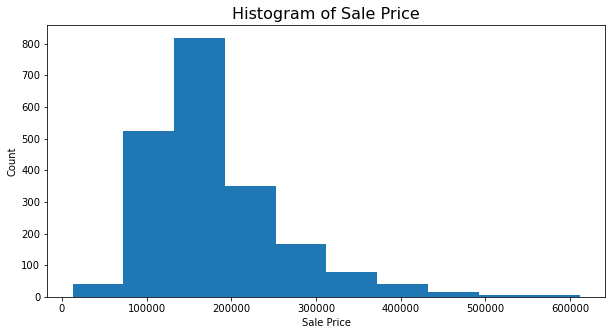

In [34]:
# Histogram of target variable (SalePrice)
plt.figure(figsize=(10,5))
plt.hist(train['SalePrice'])
plt.title('Histogram of Sale Price', size = 16)
plt.xlabel('Sale Price')
plt.ylabel('Count');

The histogram of target variable is positively skewed. With most house ranging from around 140000 to 180000 dollars.

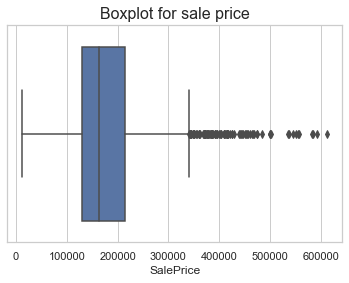

In [35]:
sns.set_theme(style = 'whitegrid')
sns.boxplot(x = 'SalePrice', data = train)
plt.title('Boxplot for sale price', size = 16);

There are outliers towards the end sale price. Outliers of houses price 500000 dollars and above will be removed.

In [36]:
# Removing outliers of saleprice of more than 500000 dollars
train = train[train['SalePrice'] <= 500000]

In [37]:
train.shape

(2039, 78)

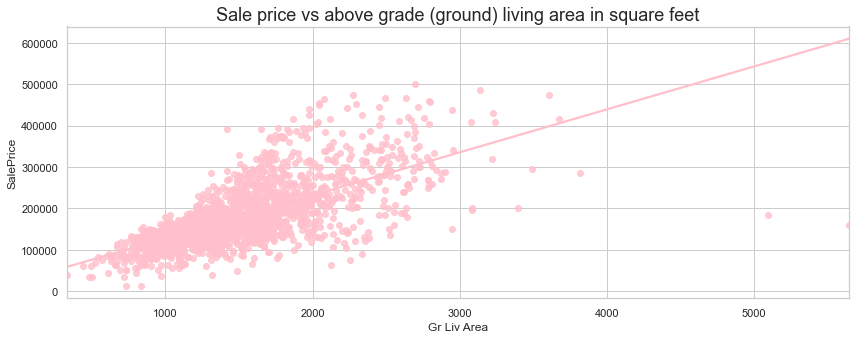

In [38]:
# Plot of Sale Price vs Gr Liv Area 
g = sns.regplot(x='Gr Liv Area', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs above grade (ground) living area in square feet', size=18);

Above grade living area and sale price are positively correlated. However, there appears to be 2 outliers with above grade living area to have abnormal low sale price. Hence, those will be removed.

In [39]:
# Remove rows with gr liv area of more than 4000 square feet
train = train[train['Gr Liv Area'] <= 4000]

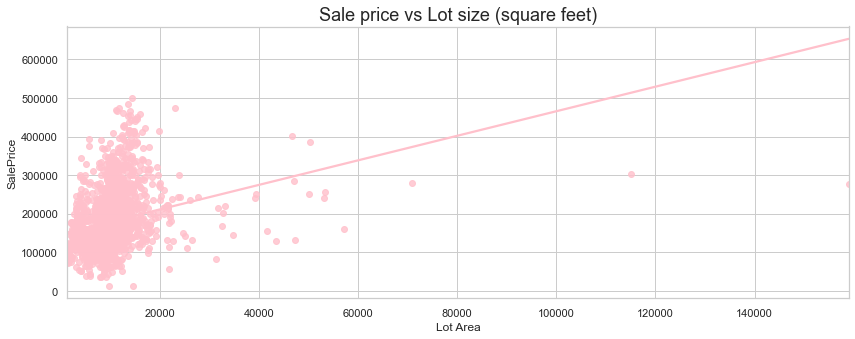

In [40]:
# Plot of Sale Price vs Lot Area
g = sns.regplot(x='Lot Area', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
#g.set(xlim=(0, 20000))
g.set_title('Sale price vs Lot size (square feet)', size=18);

In [41]:
train['log_lotsize'] = np.log(train['Lot Area'])

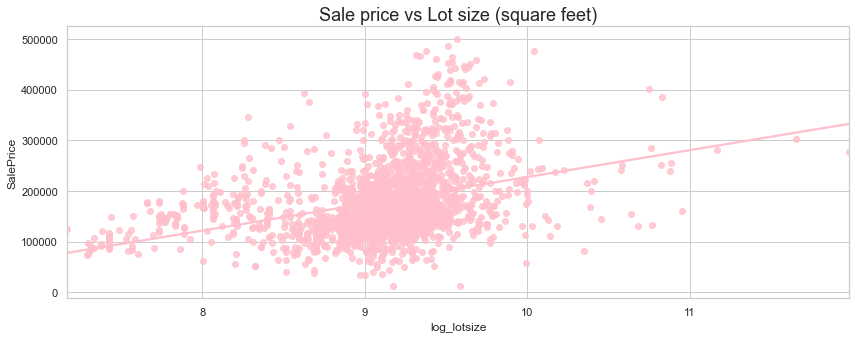

In [42]:
# Plot of Sale Price vs Lot Area
g = sns.regplot(x='log_lotsize', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs Lot size (square feet)', size=18);

Lot area and sale price are positively correlated. However, there appears to be 2 outliers with above grade living area to have abnormal low sale price. Hence, those will be removed.

In [43]:
# Removing rows with lot area of more than 100000 square feet
train = train[train['Lot Area'] <= 100000]

In [44]:
# final train dataset shape
train.shape

(2035, 79)

### Feature Engineering

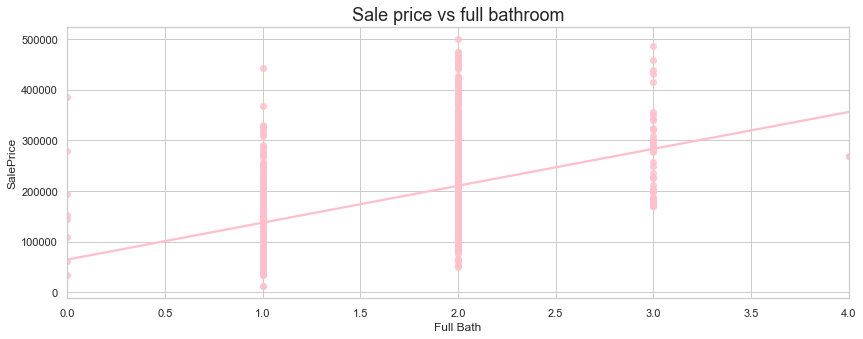

In [45]:
# Regplot of saleprice vs full bath
g = sns.regplot(x='Full Bath', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs full bathroom', size=18);

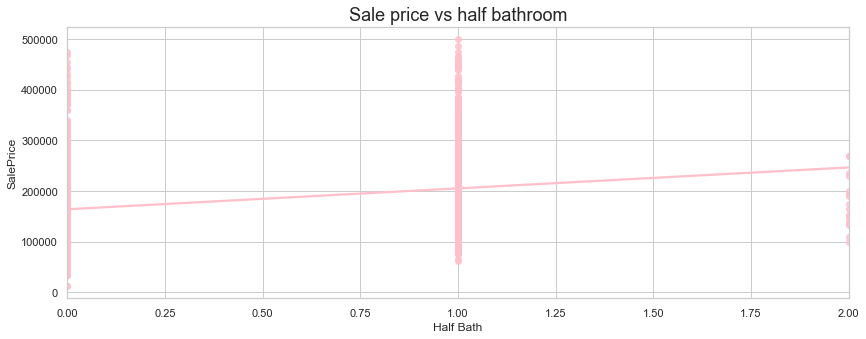

In [46]:
# Regplot of saleprice vs half bath
g = sns.regplot(x='Half Bath', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs half bathroom', size=18);

In [47]:
# Create a column called total bath from half bath and full bath
train['total_bath'] = (0.5 * train['Half Bath']) + train['Full Bath']

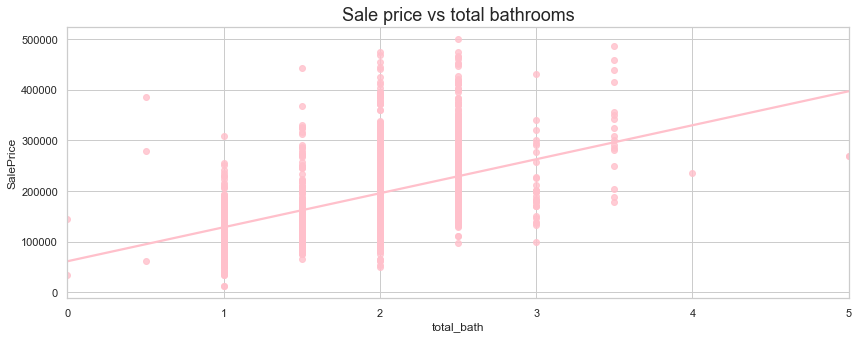

In [48]:
# Regplot of saleprice vs total bathrooms
g = sns.regplot(x='total_bath', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs total bathrooms', size=18);

In [49]:
# Other variables correlation with SalePrice
cor = train.corr()
cor_var = cor['SalePrice'].sort_values()
cor_var

PID               -0.246988
Enclosed Porch    -0.134052
Kitchen AbvGr     -0.128404
Overall Cond      -0.089661
MS SubClass       -0.081359
Id                -0.047026
Bsmt Half Bath    -0.043806
Low Qual Fin SF   -0.041321
Yr Sold           -0.017145
Misc Val          -0.008719
BsmtFin SF 2      -0.004124
Pool Area          0.029585
Mo Sold            0.045187
3Ssn Porch         0.055549
Screen Porch       0.105218
Bedroom AbvGr      0.135448
Bsmt Unf SF        0.189495
2nd Flr SF         0.246928
Half Bath          0.278479
Bsmt Full Bath     0.284444
Lot Area           0.319980
Wood Deck SF       0.328412
Lot Frontage       0.345366
Open Porch SF      0.345914
log_lotsize        0.350920
BsmtFin SF 1       0.437490
Mas Vnr Area       0.472651
Fireplaces         0.477072
TotRms AbvGrd      0.487579
Full Bath          0.536212
Year Remod/Add     0.561810
Garage Yr Blt      0.568556
total_bath         0.572712
Year Built         0.584280
1st Flr SF         0.635539
Total Bsmt SF      0

Correlation range from -1 to 1 with each ends being highly correlated and 0 means no correlation. The above shows the correlation each features have with Sale price (target).

In [50]:
# Features with more than 0.5 correlation
features_high_corr = abs(cor_var[cor_var > 0.5])
features_high_corr

Full Bath         0.536212
Year Remod/Add    0.561810
Garage Yr Blt     0.568556
total_bath        0.572712
Year Built        0.584280
1st Flr SF        0.635539
Total Bsmt SF     0.652222
Garage Area       0.652259
Garage Cars       0.653176
Gr Liv Area       0.711391
Overall Qual      0.808244
SalePrice         1.000000
Name: SalePrice, dtype: float64

In [51]:
# List of numeric variables to include
numeric_variables = features_high_corr.index.to_list()
numeric_variables.remove('SalePrice')
numeric_variables

['Full Bath',
 'Year Remod/Add',
 'Garage Yr Blt',
 'total_bath',
 'Year Built',
 '1st Flr SF',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 'Gr Liv Area',
 'Overall Qual']

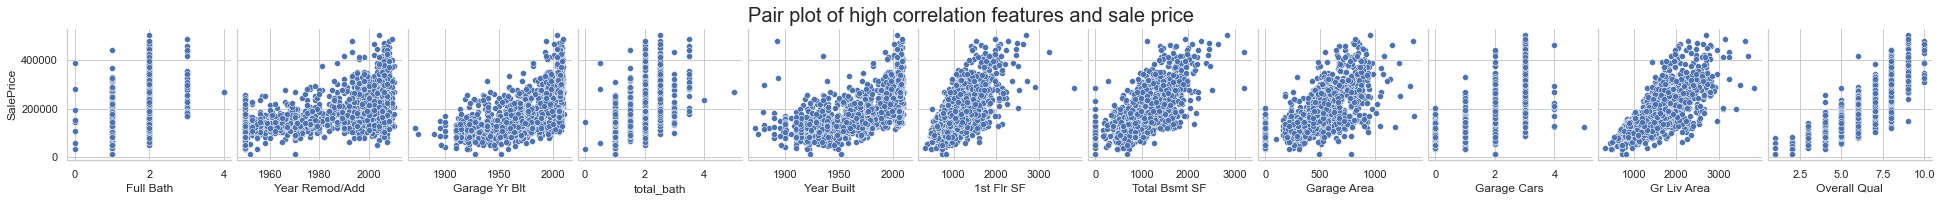

In [52]:
# pairplot of high correlation features and saleprice
g = sns.pairplot(train, x_vars=numeric_variables, y_vars=['SalePrice'])
g.fig.suptitle('Pair plot of high correlation features and sale price', y = 1.08, size = 20);

They are all positively correlated with sale price of the house. They will be used as features for the model.

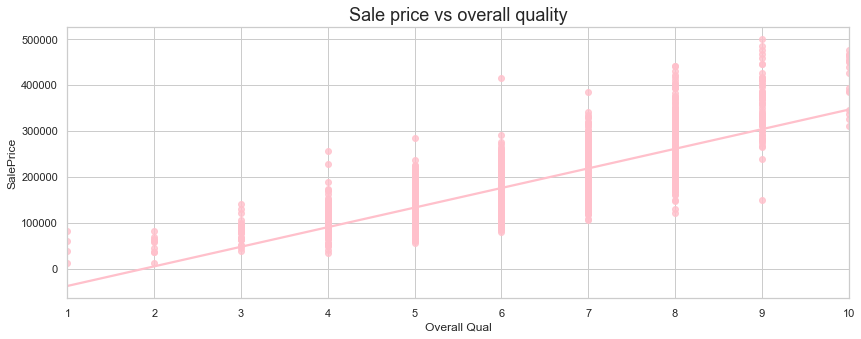

In [53]:
# Regplot of saleprice vs overall quality
g = sns.regplot(x='Overall Qual', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs overall quality', size=18);

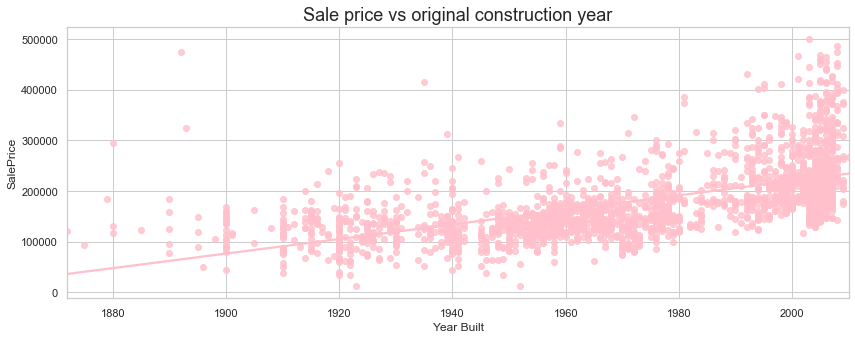

In [54]:
# Regplot of saleprice vs year built
g = sns.regplot(x='Year Built', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs original construction year', size=18);

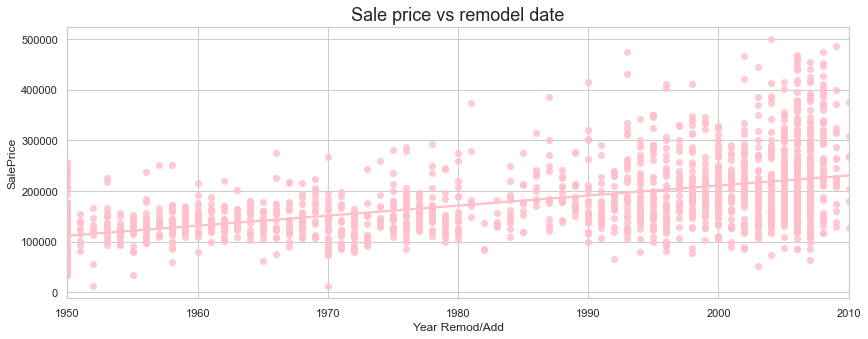

In [55]:
# Regplot of saleprice vs remodel date
g = sns.regplot(x='Year Remod/Add', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs remodel date', size=18);

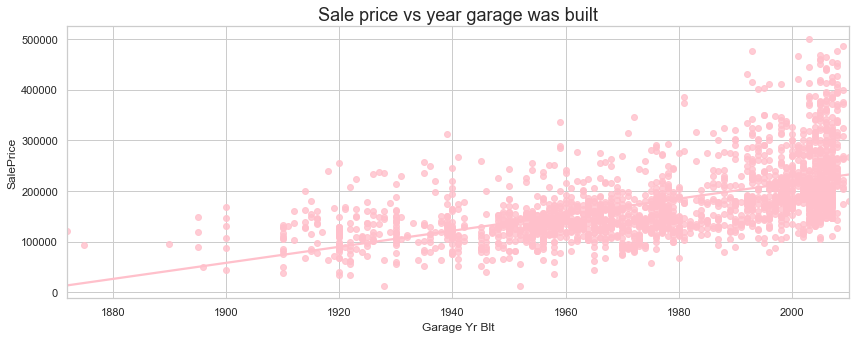

In [56]:
# Regplot of saleprice vs year garage was built
g = sns.regplot(x='Garage Yr Blt', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs year garage was built', size=18);

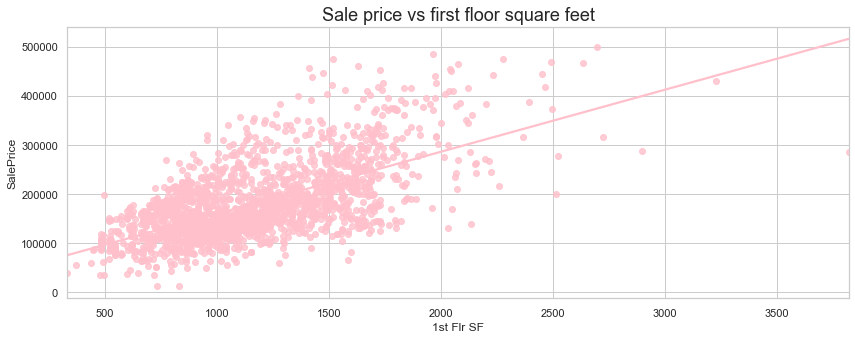

In [57]:
# Regplot of saleprice vs 1st floor square feet
g = sns.regplot(x='1st Flr SF', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs first floor square feet', size=18);

There seem to be an outlier at above 3500 square feet. Hence, it will be removed from the dataset

In [58]:
train = train[train['1st Flr SF'] <= 3500]

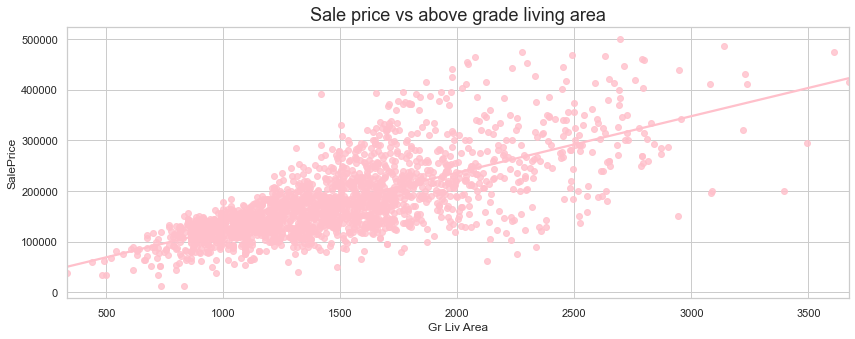

In [59]:
# Regplot of saleprice vs above grade living area
g = sns.regplot(x='Gr Liv Area', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs above grade living area', size=18);

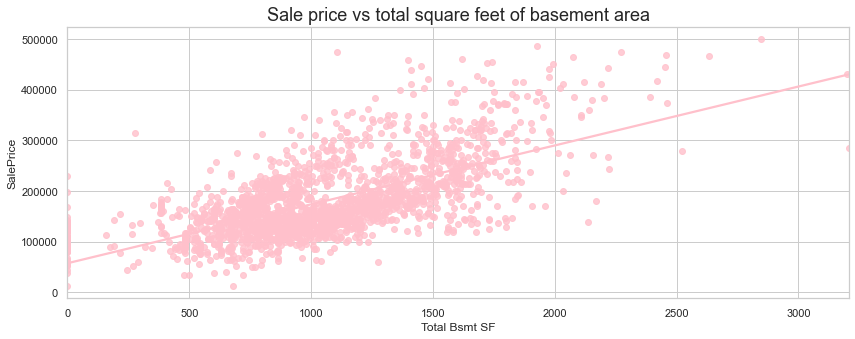

In [60]:
# Regplot of saleprice vs above total basement area
g = sns.regplot(x='Total Bsmt SF', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs total square feet of basement area', size=18);

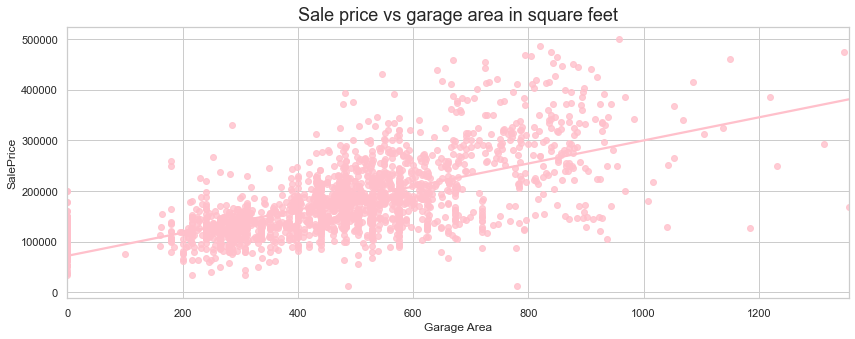

In [61]:
# Regplot of saleprice vs garage area
g = sns.regplot(x='Garage Area', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs garage area in square feet', size=18);

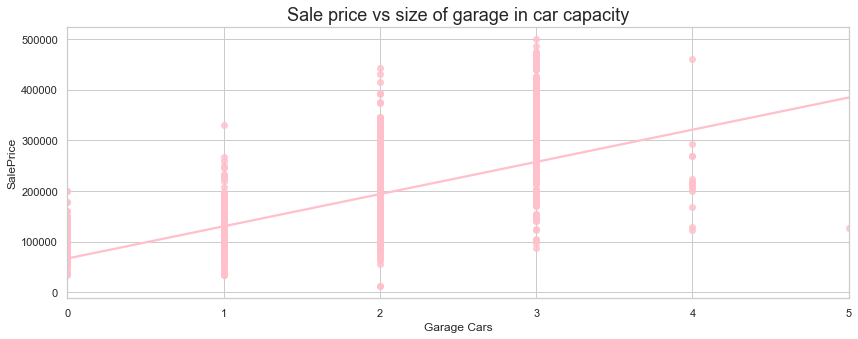

In [62]:
# Regplot of saleprice vs size of garage in car capacity
g = sns.regplot(x='Garage Cars', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs size of garage in car capacity', size=18);

There is an outlier for size 5 garage cars. It will be removed from the dataset.

In [63]:
train = train[train['Garage Cars'] != 5]

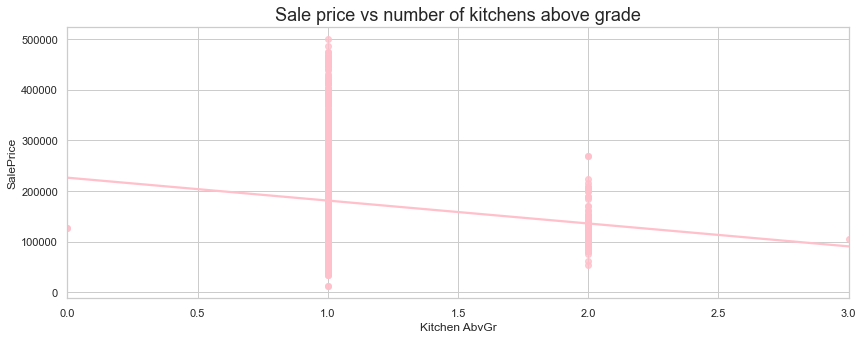

In [64]:
# Regplot of saleprice vs number of kitchen above grade
g = sns.regplot(x='Kitchen AbvGr', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs number of kitchens above grade', size=18);

An increase in number of kitchens above grade does not seem to help increase the sale price of the house.

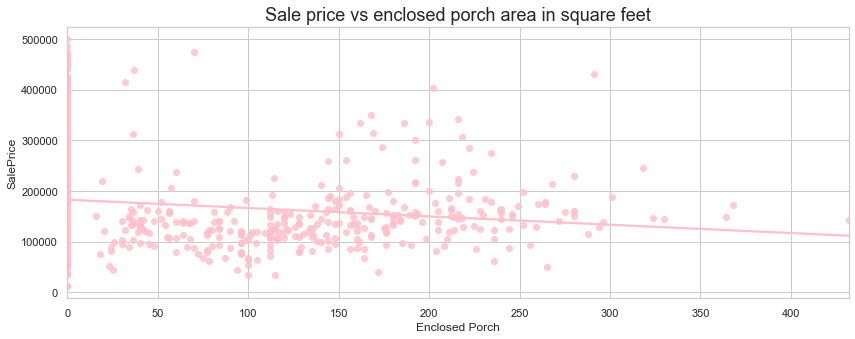

In [65]:
# Regplot of saleprice vs Enclosed Porch
g = sns.regplot(x='Enclosed Porch', y ='SalePrice', data=train, ci=None, color='pink')
g.figure.set_size_inches(14,5)
g.set_title('Sale price vs enclosed porch area in square feet', size=18);

Increasing the area of enclosed porch does not seem to continuously improve the sale price of the house.

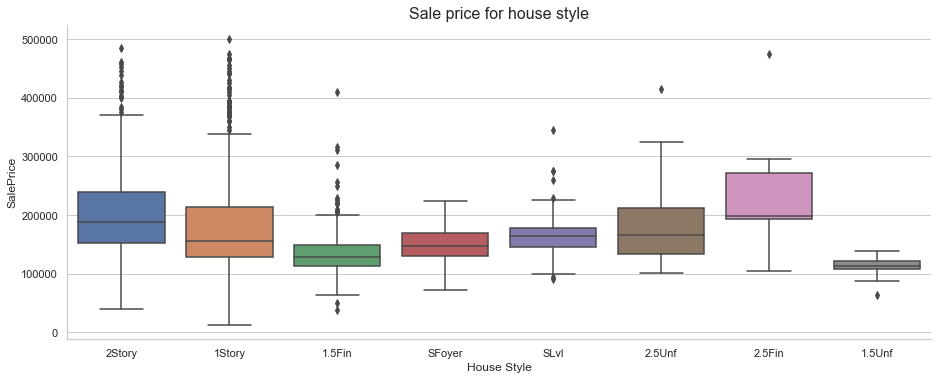

In [66]:
# Boxplot of sale price for house style
g = sns.catplot(x='House Style', y='SalePrice', kind='box', data=train)
plt.title('Sale price for house style', size=16)
g.fig.set_figwidth(15)
g.fig.set_figheight(5);

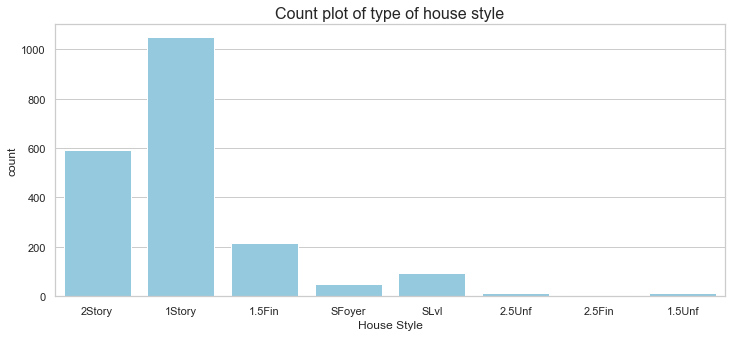

In [67]:
# Count plot of housestyle
plt.figure(figsize=(12,5))
sns.countplot(x='House Style', data=train, color='skyblue')
plt.title('Count plot of type of house style', size=16);

The house style does not seem to affect house price much as the medians and interquartile range for each house style are roughly the similar.

In [68]:
# sort neighborhood according to their median saleprice
med_neigh_df = train.groupby('Neighborhood').agg(median_saleprice = ('SalePrice', np.median)).sort_values('median_saleprice', ascending=False)
med_neigh_df

,median_saleprice
Neighborhood,
NridgHt,315000
NoRidge,300000
GrnHill,280000
StoneBr,276500
Veenker,260000
Somerst,224000
Timber,220000
ClearCr,211000
CollgCr,200000


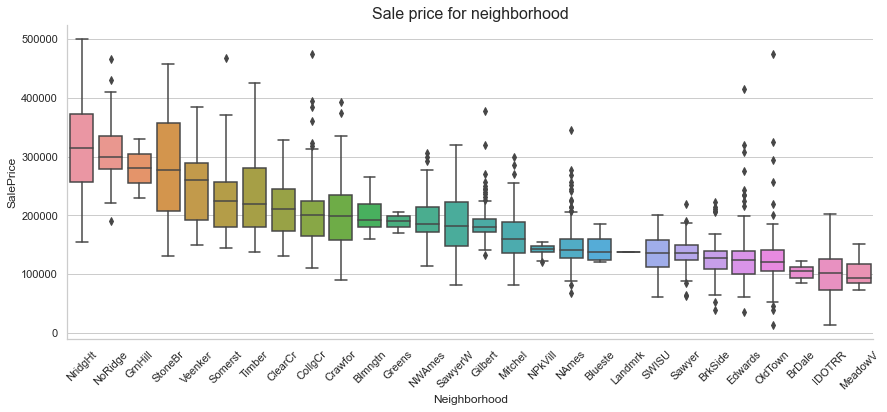

In [69]:
# Boxplot of sale price for neighborhood
g = sns.catplot(x='Neighborhood', y='SalePrice', kind='box', data=train, order=med_neigh_df.index.tolist())
plt.title('Sale price for neighborhood', size=16)
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set_xticklabels(rotation=45);

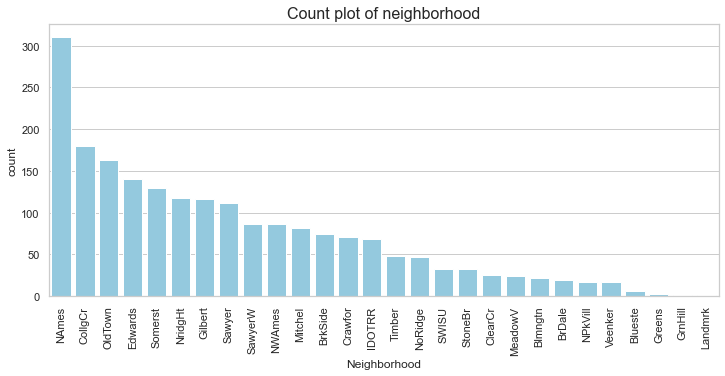

In [70]:
# Count plot of neighborhood
plt.figure(figsize=(12,5))
sns.countplot(x='Neighborhood', data=train, color='skyblue', order=train['Neighborhood'].value_counts().index)
plt.title('Count plot of neighborhood', size=16)
plt.xticks(rotation=90);

In [71]:
# range for each group
(315000 - 92450) / 3

74183.33333333333

This was done before train test split as both before and after generated around similar ranges.

The different neighborhoods looked like a good predictor to predict the price of the house. Prior to adding to the model, they would be splitted into 3 groups, according to their median saleprice.<br>
Group 1 contains neighborhood with 166633 dollars and below.<br>
Group 2 contains neighborhood with sale price of 166633(excluding) to 240817(including) dollars.<br>
Group 3 contains neighborhood with more than 240817 dollars.

In [72]:
# Split neighborhood into 3 groups
group_1 = med_neigh_df[med_neigh_df['median_saleprice'].values <= 166633]
group_2 = med_neigh_df[(med_neigh_df['median_saleprice'].values > 166633) & (med_neigh_df['median_saleprice'].values <= 240817)]
group_3 = med_neigh_df[med_neigh_df['median_saleprice'].values > 240817]

In [73]:
# new column in train dataframe with dummies values
train['neigh_group1'] = train['Neighborhood'].map(lambda x: 1 if x in group_1.index else 0)
# new column in train dataframe with dummies value
train['neigh_group2'] = train['Neighborhood'].map(lambda x: 1 if x in group_2.index else 0)

In [74]:
# updated train df
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,log_lotsize,total_bath,neigh_group1,neigh_group2
0,109,533352170,60,RL,75.0,13517,Pave,IR1,Lvl,AllPub,...,NA,0,3,2010,WD,130500,9.511703,2.5,1,0
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,NA,0,4,2009,WD,220000,9.349406,2.5,0,1
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,NA,0,1,2010,WD,109000,8.977399,1.0,1,0
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,NA,0,4,2010,WD,174000,9.190342,2.5,0,1
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,NA,0,3,2010,WD,138500,9.563459,2.0,0,1


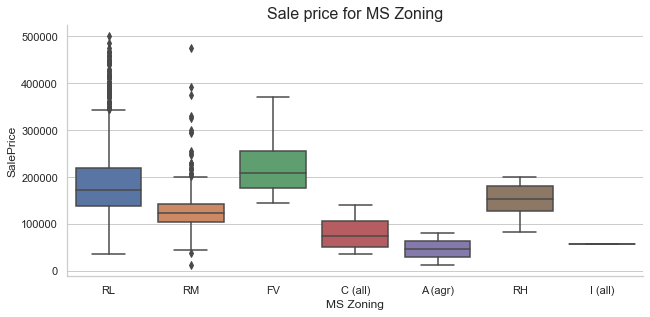

In [75]:
# Boxplot of sale price for MS Zoning
g = sns.catplot(x = 'MS Zoning', y = 'SalePrice', kind = 'box', data=train)
plt.title('Sale price for MS Zoning', size=16)
g.fig.set_figwidth(10)
g.fig.set_figheight(4);

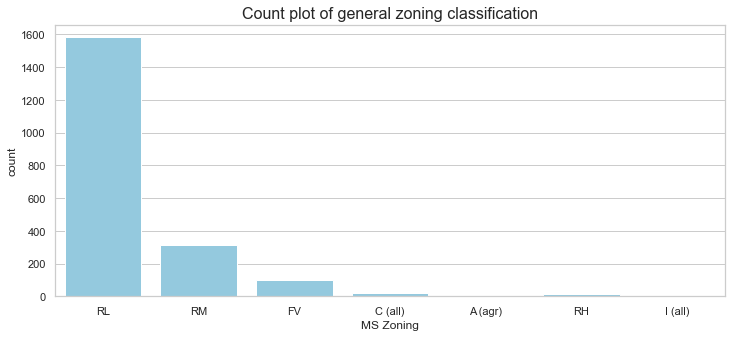

In [76]:
# Count plot of MS Zoning
plt.figure(figsize=(12,5))
sns.countplot(x='MS Zoning', data=train, color='skyblue')
plt.title('Count plot of general zoning classification', size=16);

From the box plot, although different zoning classification has different medians and interquartile range, the count plot shows that most of the observations are from RL, residential low density. Hence, it is not a good predictor as most of the data are from RL.

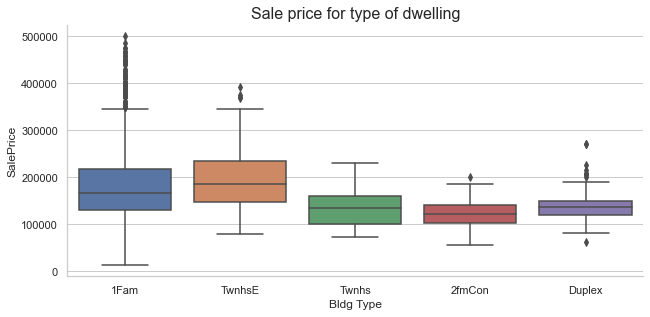

In [77]:
# Boxplot of sale price for bldg type
g = sns.catplot(x='Bldg Type', y='SalePrice', kind='box', data=train)
plt.title('Sale price for type of dwelling', size=16)
g.fig.set_figwidth(10)
g.fig.set_figheight(4);

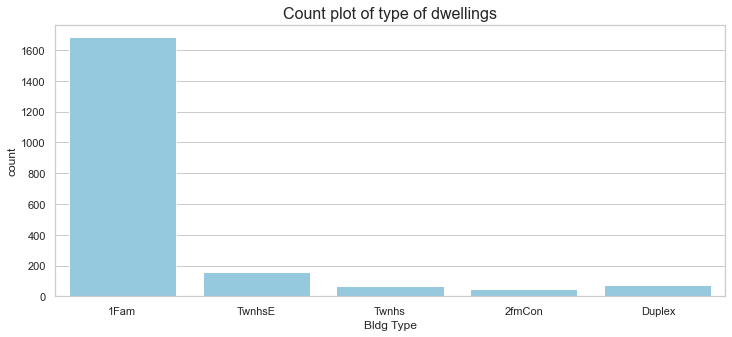

In [78]:
# Count plot of Bldg Type
plt.figure(figsize=(12,5))
sns.countplot(x='Bldg Type', data=train, color='skyblue')
plt.title('Count plot of type of dwellings', size=16);

Type of dwelling does not seem to be a good predictor as the median sale price between each dwelling are in similar ranges. Moreover, most of the data would be from 1Fam, single family detached. Hence, is not a good predictor.

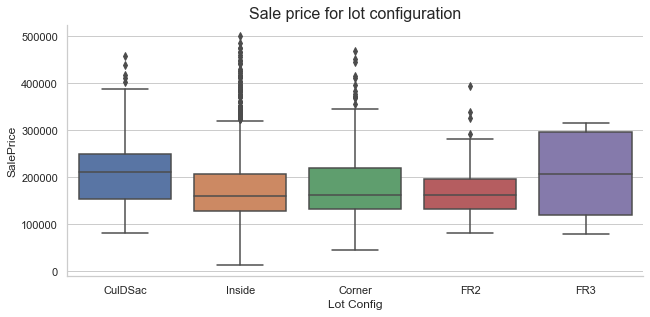

In [79]:
# Boxplot of sale price for lot config
g = sns.catplot(x='Lot Config', y='SalePrice', kind='box', data=train)
plt.title('Sale price for lot configuration', size=16)
g.fig.set_figwidth(10)
g.fig.set_figheight(4);

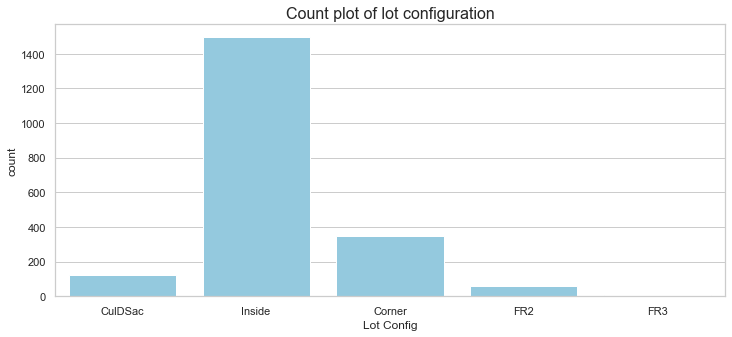

In [80]:
# Count plot of Lot Condfig
plt.figure(figsize=(12,5))
sns.countplot(x='Lot Config', data=train, color='skyblue')
plt.title('Count plot of lot configuration', size=16);

The different types of lot configuration seem to have similar medians. Data are also mostly concentrated on the inside lot. Hence, it is not a good predictor of price

## Generating X, y and train test split

### Train

After trying out to model the different features, the below features produced the lowest root mean square error.

In [81]:
# Add neighborhood dummies and numeric variables together into a new df called new_train
new_train = pd.concat([train[numeric_variables], train['neigh_group1'], train['neigh_group2']], axis = 1)
new_train

,Full Bath,Year Remod/Add,Garage Yr Blt,total_bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,neigh_group1,neigh_group2
0,2,2005,1976.0,2.5,1976,725,725.0,475.0,2.0,1479,6,1,0
1,2,1997,1997.0,2.5,1996,913,913.0,559.0,2.0,2122,7,0,1
2,1,2007,1953.0,1.0,1953,1057,1057.0,246.0,1.0,1057,5,1,0
3,2,2007,2007.0,2.5,2006,744,384.0,400.0,2.0,1444,5,0,1
4,2,1993,1957.0,2.0,1900,831,676.0,484.0,2.0,1445,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2,2007,2007.0,2.0,2007,1728,1884.0,520.0,2.0,1728,8,0,1
2047,1,1950,1961.0,1.0,1940,861,861.0,539.0,2.0,861,4,1,0
2048,1,1950,1929.0,1.5,1928,1172,896.0,342.0,2.0,1913,6,0,1
2049,1,1956,1956.0,1.0,1956,1200,1200.0,294.0,1.0,1200,4,1,0


In [82]:
# X and y for regression model
X = new_train
y = train['SalePrice']

### Test

In [83]:
# Train df neighborhood column has 2 more extra neighborhood - Landmrk and GrnHill
len(train['Neighborhood'].unique())

28

In [84]:
len(test['Neighborhood'].unique())

26

In [85]:
# add new column in train dataframe with dummies values
test['neigh_group1'] = test['Neighborhood'].map(lambda x: 1 if x in group_1.index else 0)
# add new column in train dataframe with dummies value
test['neigh_group2'] = test['Neighborhood'].map(lambda x: 1 if x in group_2.index else 0)

In [86]:
# Create a column called total bath from half bath and full bath
test['total_bath'] = (0.5 * test['Half Bath']) + test['Full Bath']

In [87]:
# updated test df
test.shape

(879, 80)

In [88]:
# test features
new_test = test[
    ['Full Bath',
     'Year Remod/Add',
     'Garage Yr Blt',
     'total_bath',
     'Year Built',
     '1st Flr SF',
     'Total Bsmt SF',
     'Garage Area',
     'Garage Cars',
     'Gr Liv Area',
     'Overall Qual',
     'neigh_group1', 
     'neigh_group2']
]

In [89]:
# updated test dataset to model
new_test

,Full Bath,Year Remod/Add,Garage Yr Blt,total_bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,neigh_group1,neigh_group2
0,2,1950,1910.0,2.0,1910,908,1020,440,1,1928,6,1,0
1,2,1977,1977.0,2.0,1977,1967,1967,580,2,1967,5,1,0
2,2,2006,2006.0,2.5,2006,664,654,426,2,1496,7,0,1
3,1,2006,1935.0,1.0,1923,968,968,480,2,968,5,1,0
4,1,1963,1963.0,1.5,1963,1394,1394,514,2,1394,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,2,1974,1974.0,2.5,1974,1084,1084,488,2,1877,6,0,1
875,2,1999,1966.0,2.5,1966,1104,1104,480,2,1988,6,1,0
876,1,1968,1968.0,1.0,1968,1211,952,322,1,1211,5,1,0
877,1,1971,1974.0,1.0,1971,864,864,528,2,864,4,1,0


In [90]:
new_test.shape

(879, 13)

### Train Test Split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

## Model on train set

### Linear Regression

In [92]:
# Create and fit Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [93]:
# RMSE for cvs lr model
lr_cv_score = np.round(np.sqrt(-cross_val_score(lr, X_train, y_train, cv=8, scoring='neg_mean_squared_error').mean()), 2)
print('Estimate of how well linear regression model does on unseen data (RMSE): ' + str(lr_cv_score))

Estimate of how well linear regression model does on unseen data (RMSE): 28260.82


#### Scale for Ridge and Lasso

In [94]:
# Separate categorical and numerical features
X_train_cat = X_train[['neigh_group1', 'neigh_group2']]
X_train_num = X_train.drop(columns = ['neigh_group1', 'neigh_group2'])

X_test_cat = X_test[['neigh_group1', 'neigh_group2']]
X_test_num = X_test.drop(columns = ['neigh_group1', 'neigh_group2'])

In [95]:
# Scale numeric values for X train and X validation
ss = StandardScaler()
X_train_num_sc = ss.fit_transform(X_train_num)

X_test_num_sc = ss.transform(X_test_num)

In [96]:
# merge cat and num back
df_train_sc = pd.DataFrame(X_train_num_sc, columns = numeric_variables)
X_train_scaled = pd.concat([df_train_sc, X_train_cat.reset_index(drop=True)], axis = 1)

df_test_sc = pd.DataFrame(X_test_num_sc, columns = numeric_variables)
X_test_scaled = pd.concat([df_test_sc, X_test_cat.reset_index(drop=True)], axis = 1)

#### Ridge Regression

In [97]:
# Create ridge model and fit to train set
ridge_model = RidgeCV(alphas = np.logspace(0, 1, 1000), store_cv_values=True, scoring='neg_mean_squared_error')
ridge_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([ 1.        ,  1.00230755,  1.00462042,  1.00693863,  1.00926219,
        1.01159111,  1.01392541,  1.01626509,  1.01861017,  1.02096066,
        1.02331658,  1.02567793,  1.02804473,  1.03041699,  1.03279473,
        1.03517796,  1.03756668,  1.03996091,  1.04236067,  1.04476597,
        1.04717682,  1.04959323,  1.05201522,  1.05444279,  1.05687597,
        1.05931476,  1.06175918,  1.06420924,  1.06666496,  1.06912634,
        1.0715...
        9.35343152,  9.37501502,  9.39664831,  9.41833153,  9.44006479,
        9.46184819,  9.48368187,  9.50556592,  9.52750047,  9.54948564,
        9.57152154,  9.59360829,  9.615746  ,  9.6379348 ,  9.6601748 ,
        9.68246612,  9.70480888,  9.72720319,  9.74964918,  9.77214697,
        9.79469667,  9.81729841,  9.8399523 ,  9.86265846,  9.88541702,
        9.9082281 ,  9.93109181,  9.95400829,  9.97697764, 10.        ]),
        scoring='neg_mean_squared_error', store_cv_values=True)

In [98]:
# Optimal alpha
ridge_model.alpha_

1.6338538778098612

In [99]:
# RMSE cvs for ridge
ridge_cv_score = np.round(np.sqrt(-cross_val_score(
                                    Ridge(alpha=ridge_model.alpha_), 
                                    X_train_scaled, 
                                    y_train, 
                                    cv=8, 
                                    scoring='neg_mean_squared_error').mean()),2)

print('Estimate of how well ridge model does on unseen data (RMSE): ' + str(ridge_cv_score))

Estimate of how well ridge model does on unseen data (RMSE): 28259.22


#### Lasso Regression

In [100]:
# Create lasso model and fit to train set
lasso_model = LassoCV(n_alphas = 200)
lasso_model.fit(X_train_scaled, y_train)

LassoCV(n_alphas=200)

In [101]:
lasso_model.alphas_

array([60346.0754718 , 58287.26193944, 56298.68848696, 54377.95874928,
       52522.75811759, 50730.85095008, 49000.0778778 , 47328.35320254,
       45713.66238336, 44154.05960899, 42647.66545293, 41192.6646087 ,
       39787.30370217, 38429.88917873, 37118.78526237, 35852.41198448,
       34629.2432799 , 33447.80514788, 32306.67387584, 31204.47432365,
       30139.87826657, 29111.60279457, 28118.4087664 , 27159.0993163 ,
       26232.51841171, 25337.54946018, 24473.1139638 , 23638.17021951,
       22831.71206382, 22052.76766029, 21300.3983284 , 20573.69741238,
       19871.78918866, 19193.82781049, 18538.99628872, 17906.50550722,
       17295.59327196, 16705.52339252, 16135.58479491, 15585.09066471,
       15053.37761936, 14539.80490882, 14043.75364335, 13564.62604773,
       13101.84474091, 12654.85204021, 12223.10928931, 11806.09620908,
       11403.31027065, 11014.26608981, 10638.49484209, 10275.54369782,
        9924.97527639,  9586.36711923,  9259.31118068,  8943.41333629,
      

In [102]:
# Optimal alpha
lasso_model.alpha_

148.80202128079856

In [103]:
# RMSE cvs for lasso
lasso_cv_score = np.round(np.sqrt(-cross_val_score(
                                    Lasso(alpha=lasso_model.alpha_), 
                                    X_train_scaled, 
                                    y_train, 
                                    cv=8, 
                                    scoring='neg_mean_squared_error').mean()), 2)

print('Estimate of how well lasso model does on unseen data (RMSE): ' + str(lasso_cv_score))

Estimate of how well lasso model does on unseen data (RMSE): 28250.32


#### ElasticNet Regression

In [104]:
# Create elasticnet model and fit to train set
elasticnet_model = ElasticNetCV(l1_ratio = np.linspace(0.01, 1, 25), n_alphas = 200)
elasticnet_model.fit(X_train_scaled, y_train)

ElasticNetCV(l1_ratio=array([0.01   , 0.05125, 0.0925 , 0.13375, 0.175  , 0.21625, 0.2575 ,
       0.29875, 0.34   , 0.38125, 0.4225 , 0.46375, 0.505  , 0.54625,
       0.5875 , 0.62875, 0.67   , 0.71125, 0.7525 , 0.79375, 0.835  ,
       0.87625, 0.9175 , 0.95875, 1.     ]),
             n_alphas=200)

In [105]:
# range of alphas
elasticnet_model.alphas_

array([[6.03460755e+06, 5.82872619e+06, 5.62986885e+06, ...,
        6.46844344e+03, 6.24776101e+03, 6.03460755e+03],
       [1.17748440e+06, 1.13731243e+06, 1.09851099e+06, ...,
        1.26213531e+03, 1.21907532e+03, 1.17748440e+03],
       [6.52390005e+05, 6.30132562e+05, 6.08634470e+05, ...,
        6.99291183e+02, 6.75433623e+02, 6.52390005e+02],
       ...,
       [6.57722893e+04, 6.35283509e+04, 6.13609684e+04, ...,
        7.05007460e+01, 6.80954878e+01, 6.57722893e+01],
       [6.29424516e+04, 6.07950581e+04, 5.87209267e+04, ...,
        6.74674675e+01, 6.51656950e+01, 6.29424516e+01],
       [6.03460755e+04, 5.82872619e+04, 5.62986885e+04, ...,
        6.46844344e+01, 6.24776101e+01, 6.03460755e+01]])

In [106]:
# Optimal alpha
elasticnet_model.alpha_

148.80202128079856

In [107]:
# Optimal l1 ratio
elasticnet_model.l1_ratio_

1.0

In [147]:
# RMSE cvs for elasticnet
elasticnet_cv_score = np.round(np.sqrt(-cross_val_score(
                                        ElasticNet(alpha=elasticnet_model.alpha_, l1_ratio=elasticnet_model.l1_ratio_), 
                                        X_train_scaled, 
                                        y_train, 
                                        cv=8, 
                                        scoring='neg_mean_squared_error').mean()), 2)

print('Estimate of how well elastic net model does on unseen data (RMSE): ' + str(elasticnet_cv_score))

Estimate of how well elastic net model does on unseen data (RMSE): 28250.32


Cross validation RMSE of how well each model generalise on unseen data:

In [109]:
print('Linear Regression: ' + str(lr_cv_score))
print('Ridge Regression: ' + str(ridge_cv_score))
print('Lasso Regression: ' + str(lasso_cv_score))
print('Elastic Net Regression: ' + str(elasticnet_cv_score))

Linear Regression: 28260.82
Ridge Regression: 28259.22
Lasso Regression: 28250.32
Elastic Net Regression: 28250.32


Lasso and elastic net regression have the lowest rmse. We can choose either one. It is essentially a lasso regression model as the l1 ratio for elastic net is 1.

## Model on validation set

### Linear Regression

In [110]:
# RMSE for validation set (normal regression)
lr_testing_rmse = np.round(np.sqrt(mean_squared_error(lr.predict(X_test), y_test)), 2)
print('Testing RMSE (LR): ' + str(lr_testing_rmse))

Testing RMSE (LR): 28397.96


In [111]:
# RMSE for y train and y train hat
lr_training_rmse = np.round(np.sqrt(mean_squared_error(lr.predict(X_train), y_train)),2)
print('Training RMSE (LR): ' + str(lr_training_rmse))

Training RMSE (LR): 27950.05


In [112]:
y_test_pred = lr.predict(X_test)

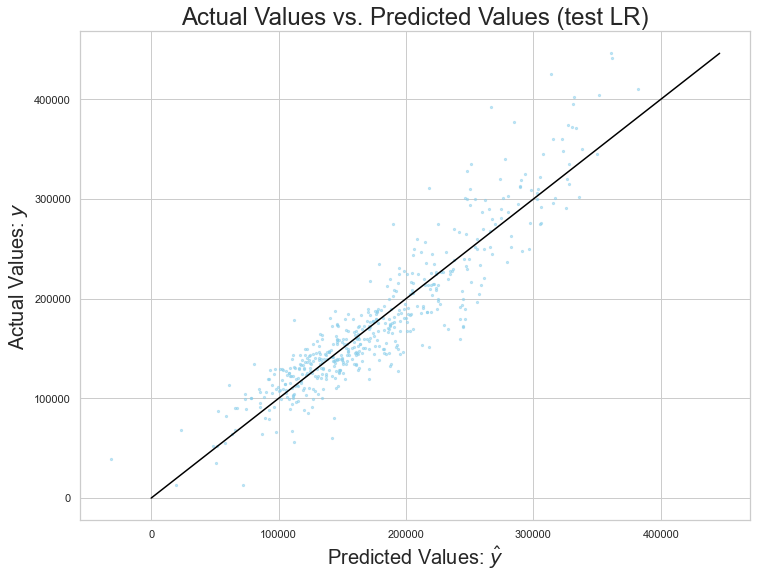

In [113]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_test_pred, y_test, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y_test)],
         [0, np.max(y_test)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Actual Values vs. Predicted Values (test LR)', fontsize = 24);

Most of the blue dots falling neat the black diagonal line, indicating a good fit.

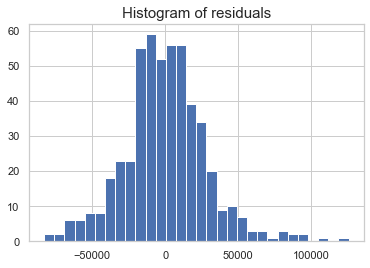

In [114]:
resid = y_test - y_test_pred
plt.hist(resid, bins=30)
plt.title('Histogram of residuals', size=15)
plt.show()

Histogram of residuals shows a near normal distribution, with slight right skewed.

### Ridge Regression

In [115]:
# Fit train set into ridge with optimal alpha
ridge_best = Ridge(alpha=ridge_model.alpha_)
ridge_best.fit(X_train_scaled, y_train)

Ridge(alpha=1.6338538778098612)

In [116]:
# RMSE for validation set (Ridge)
ridge_testing_rmse = np.round(np.sqrt(mean_squared_error(y_test, ridge_best.predict(X_test_scaled))), 2)
print('Testing RMSE (ridge): ' + str(ridge_testing_rmse))

Testing RMSE (ridge): 28382.21


In [117]:
# RMSE for training set (Ridge)
ridge_training_rmse = np.round(np.sqrt(mean_squared_error(y_train, ridge_best.predict(X_train_scaled))), 2)
print('Training RMSE (ridge): ' + str(ridge_training_rmse))

Training RMSE (ridge): 27951.81


In [118]:
y_pred_ridgebest = ridge_best.predict(X_test_scaled)

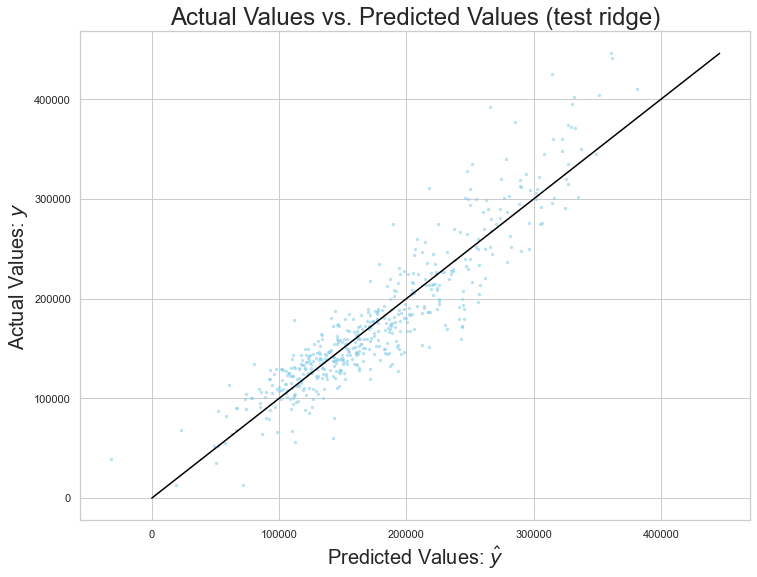

In [119]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_pred_ridgebest, y_test, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y_test)],
         [0, np.max(y_test)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Actual Values vs. Predicted Values (test ridge)', fontsize = 24);

Similar to above, most of the blue dots lie on the line where actual y and predicted y are the same. This indicates a good model.

### Lasso Regression

In [120]:
# Fit train data into lasso with optimal alpha
lasso_best = Lasso(alpha=lasso_model.alpha_)
lasso_best.fit(X_train_scaled, y_train)

Lasso(alpha=148.80202128079856)

In [121]:
# RMSE of y validation and y validation hat (lasso)
lasso_testing_rmse = np.round(np.sqrt(mean_squared_error(y_test, lasso_best.predict(X_test_scaled))), 2)
print('Testing RMSE (lasso): ' + str(lasso_testing_rmse))

Testing RMSE (lasso): 28328.74


In [122]:
# RMSE of y train and y train hat (lasso)
lasso_training_rmse = np.round(np.sqrt(mean_squared_error(y_train, lasso_best.predict(X_train_scaled))), 2)
print('Training RMSE (lasso): ' + str(lasso_training_rmse))

Training RMSE (lasso): 27986.47


In [123]:
y_pred_lassobest = lasso_best.predict(X_test_scaled)

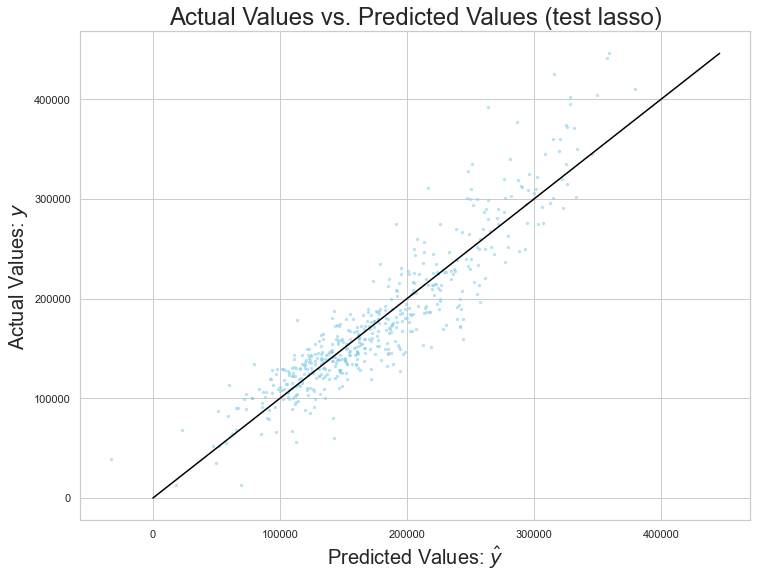

In [124]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_pred_lassobest, y_test, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y_test)],
         [0, np.max(y_test)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Actual Values vs. Predicted Values (test lasso)', fontsize = 24);

Similar to ridge and linear regression explanation above.

### Elastic Net Regression

In [125]:
# Fit train data into optimal alpha and l1 ratio for elasticnet
elasticnet_best = ElasticNet(
    alpha=elasticnet_model.alpha_, 
    l1_ratio=elasticnet_model.l1_ratio_
)

elasticnet_best.fit(X_train_scaled, y_train)

ElasticNet(alpha=148.80202128079856, l1_ratio=1.0)

In [126]:
y_pred_elasticnet = elasticnet_best.predict(X_test_scaled)

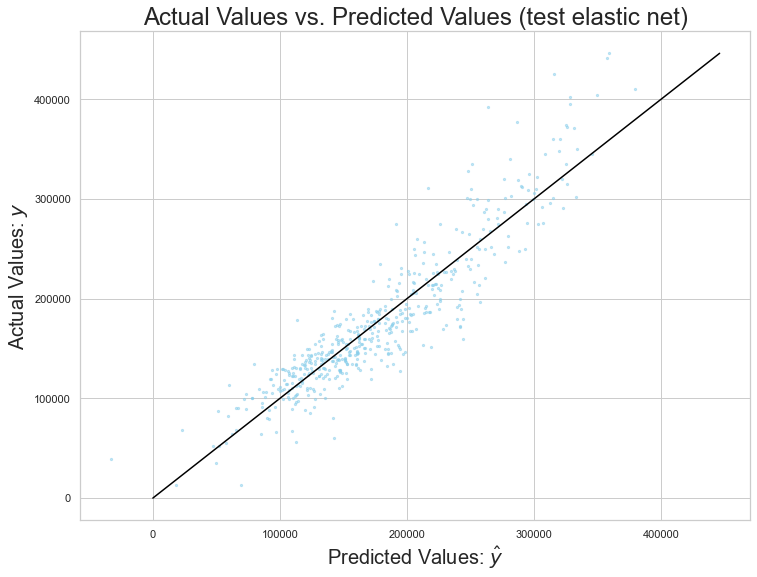

In [127]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_pred_elasticnet, y_test, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y_test)],
         [0, np.max(y_test)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Actual Values vs. Predicted Values (test elastic net)', fontsize = 24);

Simlar observation observed as seen in the graph for linear, ridge and lasso regression.

In [128]:
# RMSE of y validation and y validation hat (elasticnet)
elasticnet_testing_rmse = np.round(np.sqrt(mean_squared_error(y_test, elasticnet_best.predict(X_test_scaled))), 2)
print('Testing RMSE (elastic net): ' + str(elasticnet_testing_rmse))

Testing RMSE (elastic net): 28328.74


In [129]:
# RMSE of y train and y train hat (elasticnet)
elasticnet_training_rmse = np.round(np.sqrt(mean_squared_error(y_train, elasticnet_best.predict(X_train_scaled))), 2)
print('Training RMSE (elastic net): ' + str(elasticnet_training_rmse))

Training RMSE (elastic net): 27986.47


RMSE for training set (yhat and yactual):

In [130]:
print('Linear Regression: ' + str(lr_training_rmse))
print('Ridge Regression: ' + str(ridge_training_rmse))
print('Lasso Regression: ' + str(lasso_training_rmse))
print('Elastic Net Regression: ' + str(elasticnet_training_rmse))

Linear Regression: 27950.05
Ridge Regression: 27951.81
Lasso Regression: 27986.47
Elastic Net Regression: 27986.47


RMSE for validation set (yhat and yactual):

In [131]:
print('Linear Regression: ' + str(lr_testing_rmse))
print('Ridge Regression: ' + str(ridge_testing_rmse))
print('Lasso Regression: ' + str(lasso_testing_rmse))
print('Elastic Net Regression: ' + str(elasticnet_testing_rmse))

Linear Regression: 28397.96
Ridge Regression: 28382.21
Lasso Regression: 28328.74
Elastic Net Regression: 28328.74


From the RMSE of validation set, they also agree that lasso and elastic net gave the best score. The optimal l1 ratio for elastic net is 1, which basically transform it into a lasso regression. Hence, we can actually chose either. I will choose lasso to retrain on the full train dataset before predicting on the actual test set.

## Retrain full train dataset on Lasso Regression

In [132]:
# Scale X 
ss2 = StandardScaler()

X_cat = X[['neigh_group1', 'neigh_group2']]
X_num = X.drop(columns = ['neigh_group1', 'neigh_group2'])
X_num_sc = ss2.fit_transform(X_num)
df_X_sc = pd.DataFrame(X_num_sc, columns = numeric_variables)
X_scaled = pd.concat([df_X_sc, X_cat.reset_index(drop=True)], axis = 1)

In [133]:
# Fit to full train set
lasso_full = LassoCV(alphas = np.linspace(10, 100, 100))

lasso_full.fit(X_scaled,y)

LassoCV(alphas=array([ 10.        ,  10.90909091,  11.81818182,  12.72727273,
        13.63636364,  14.54545455,  15.45454545,  16.36363636,
        17.27272727,  18.18181818,  19.09090909,  20.        ,
        20.90909091,  21.81818182,  22.72727273,  23.63636364,
        24.54545455,  25.45454545,  26.36363636,  27.27272727,
        28.18181818,  29.09090909,  30.        ,  30.90909091,
        31.81818182,  32.72727273,  33.63636364,  34.54545455,
        35.45454545,  36.3...
        71.81818182,  72.72727273,  73.63636364,  74.54545455,
        75.45454545,  76.36363636,  77.27272727,  78.18181818,
        79.09090909,  80.        ,  80.90909091,  81.81818182,
        82.72727273,  83.63636364,  84.54545455,  85.45454545,
        86.36363636,  87.27272727,  88.18181818,  89.09090909,
        90.        ,  90.90909091,  91.81818182,  92.72727273,
        93.63636364,  94.54545455,  95.45454545,  96.36363636,
        97.27272727,  98.18181818,  99.09090909, 100.        ]))

In [134]:
# alphas range
lasso_full.alphas_

array([100.        ,  99.09090909,  98.18181818,  97.27272727,
        96.36363636,  95.45454545,  94.54545455,  93.63636364,
        92.72727273,  91.81818182,  90.90909091,  90.        ,
        89.09090909,  88.18181818,  87.27272727,  86.36363636,
        85.45454545,  84.54545455,  83.63636364,  82.72727273,
        81.81818182,  80.90909091,  80.        ,  79.09090909,
        78.18181818,  77.27272727,  76.36363636,  75.45454545,
        74.54545455,  73.63636364,  72.72727273,  71.81818182,
        70.90909091,  70.        ,  69.09090909,  68.18181818,
        67.27272727,  66.36363636,  65.45454545,  64.54545455,
        63.63636364,  62.72727273,  61.81818182,  60.90909091,
        60.        ,  59.09090909,  58.18181818,  57.27272727,
        56.36363636,  55.45454545,  54.54545455,  53.63636364,
        52.72727273,  51.81818182,  50.90909091,  50.        ,
        49.09090909,  48.18181818,  47.27272727,  46.36363636,
        45.45454545,  44.54545455,  43.63636364,  42.72

In [135]:
# Optimal alpha
lasso_full.alpha_

60.90909090909091

In [136]:
# Fit train data into optimal alpha and l1 ratio for elasticnet
lasso_final = Lasso(alpha=lasso_full.alpha_)

lasso_final.fit(X_scaled, y)

Lasso(alpha=60.90909090909091)

In [137]:
# RMSE for final train elastic net regression
cvs_lasso_final = np.round(np.sqrt(-cross_val_score(
                                        Lasso(alpha = lasso_full.alpha_), 
                                        X_scaled, 
                                        y, 
                                        cv = 5, 
                                        scoring='neg_mean_squared_error').mean()), 2)

print('Estimate of how well final lasso regression generalise on unseen data: ' + str(cvs_lasso_final))

Estimate of how well final lasso regression generalise on unseen data: 28216.63


In [138]:
# RMSE of y and y hat
lasso_rmse = np.round(np.sqrt(mean_squared_error(y, lasso_final.predict(X_scaled))), 2)
print('RMSE for lasso: ' + str(lasso_rmse))

RMSE for lasso: 28026.52


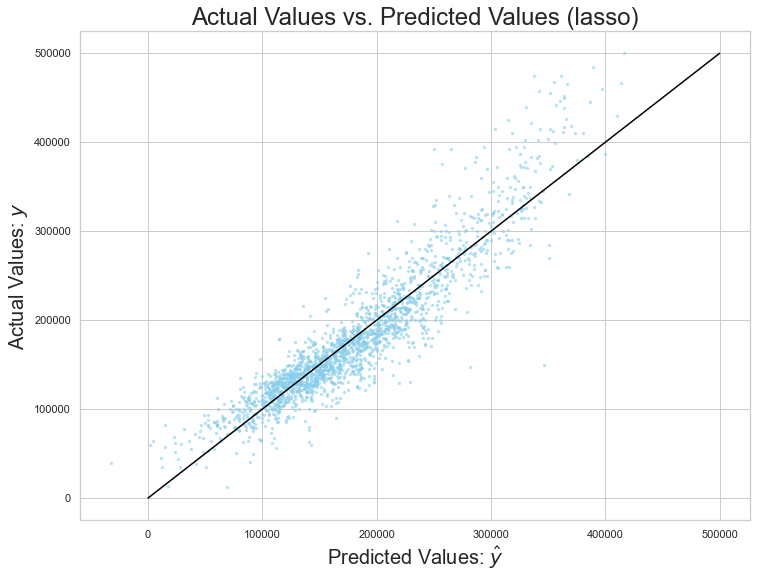

In [139]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(lasso_final.predict(X_scaled), y, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Actual Values vs. Predicted Values (lasso)', fontsize = 24);

In [140]:
lasso_final.coef_

array([ -5963.61990631,   7894.74727156,  -2362.88606988,     -0.        ,
         8364.64029542,   6407.79818003,  10009.4017786 ,   9276.06919902,
           -0.        ,  24020.77166971,  20866.44972796, -38530.11979704,
       -31538.02662922])

Equation:

Sale price = -5961.6 * X1 + 7894.7 * X2 - -2362.8 * X3 + 8364.6 * X5 + 6407.8 * X6 + 10009.4 * X7 + 9276.1 * X8 + 24020.8 * X10 + 20866.4 * X11 - 38530.1 * X12 - 31538.0 * X13

Legend:

X1 to X13 represent features: 'Full Bath', 'Year Remod/Add', 'Garage Yr Blt', 'total_bath', 'Year Built', '1st Flr SF', 'Total Bsmt SF', 'Garage Area', 'Garage Cars', 'Gr Liv Area', 'Overall Qual', 'neigh_group1', 'neigh_group2' respectively.

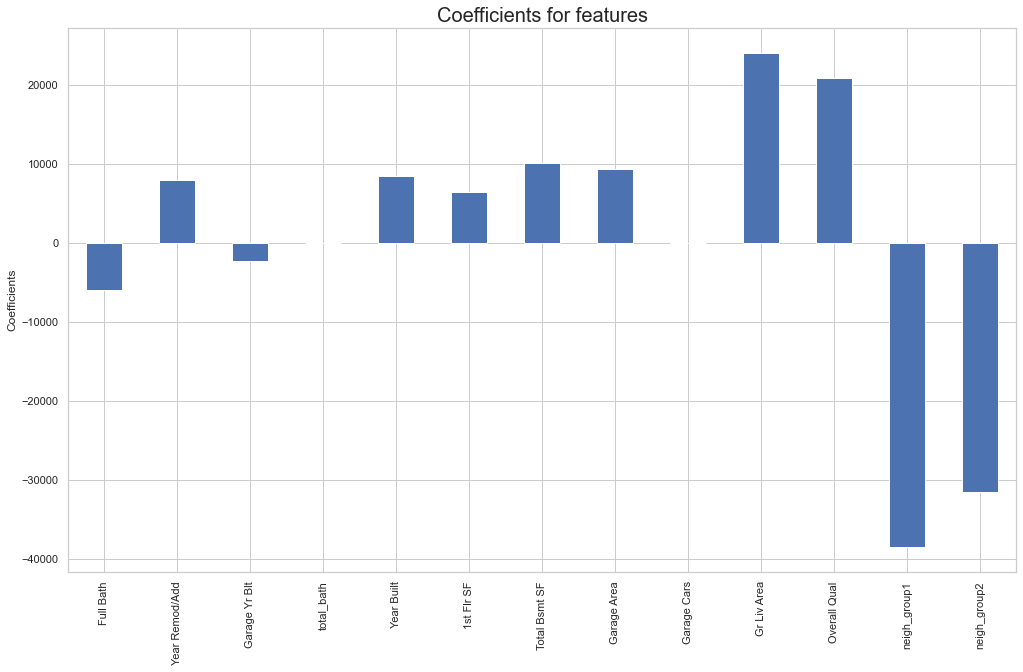

In [141]:
pd.Series(lasso_final.coef_, index = X_train.columns.to_list()).plot.bar(figsize=(17,10))
plt.ylabel('Coefficients')
plt.title('Coefficients for features', size = 20);

- For each of the first 11 coefficients (numeric features), with a 1 unit increase in x, saleprice will increase or decrease by the coefficient, depending on the sign. Positive indicates increase and negative indicates decrease. 

- For numerical features, all have positive coefficents except "full bath" and "garage yr built".

- "Total bath" and "garage cars" coefficients have been zero-ed out. 

- Coefficients for "neigh_group1" and "neigh_group2" are negative because they are relative to the "neigh_group3" (reference group, consisting of neighborhoods that are in the highest range of sale price). Houses in "neigh_group1" have the lowest median price and hence has the most negative coefficient of the 3 neighborhood groups. Houses in "neigh_group2" have the next lowest median price, resulting in a coefficient that is between that of "neigh_group1" and 0. 

## Predict on test dataset using Lasso Regression

In [142]:
# Scale X 
ss = StandardScaler()

new_test_cat = new_test[['neigh_group1', 'neigh_group2']]
new_test_num = new_test.drop(columns = ['neigh_group1', 'neigh_group2'])
new_test_num_sc = ss2.transform(new_test_num)
df_new_test_sc = pd.DataFrame(new_test_num_sc, columns = numeric_variables)
new_test_scaled = pd.concat([df_new_test_sc, new_test_cat.reset_index(drop=True)], axis = 1)

In [143]:
# prediction of sale price
array_y = lasso_final.predict(new_test_scaled)

In [144]:
# put the predicted y and id into a dataframe
df_y = pd.DataFrame(array_y, columns=['SalePrice'])
predict_y = pd.concat([test['Id'], df_y], axis=1)
predict_y

,Id,SalePrice
0,2658,158591.041471
1,2718,215736.383875
2,2414,184069.463990
3,1989,129988.665508
4,625,178010.570139
...,...,...
874,1662,190785.777948
875,1234,197777.660242
876,1373,134508.302626
877,1672,104361.915488


In [145]:
# Save to csv file
predict_y.to_csv(r'.\datasets\salepricepredict.csv', index=False)

## Conclusions

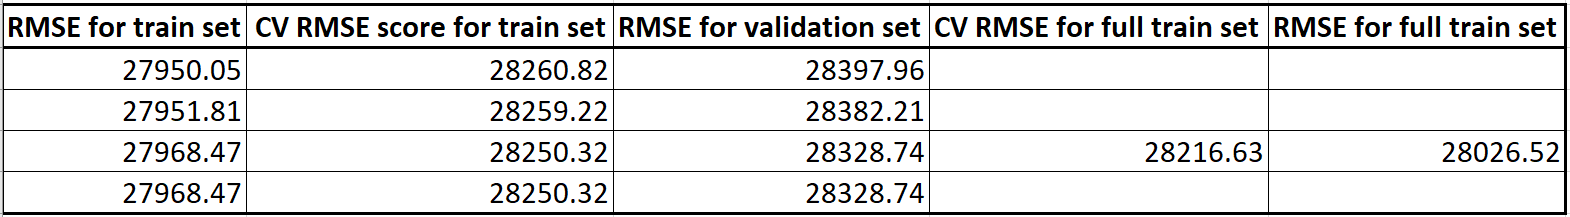

Root mean squared error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are. RMSE is a measure of how spread out these residuals are. It tells you how concentrated the data is around the line of best fit. If residual is 0, RMSE is 0.

[RMSE reference](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/)

Root mean squared errors for cross validation and for residuals are similar across all 4 models.
By using 5-fold cross validation, it allows to train and test the models 5 times of different subsets of training data and build up an estimate of the performance of the model on unseen data. By comparing the cross validation scores across the models, lasso and elastic net showed the same and best score.
The final re-trained lasso model was used to predict the new test set and saved as a csv file under the datasets folder.

The root mean squared error for all models are in close competition with one another. Elastic Net gave an optimal l1 ratio of 1, which equate to the lasso regression. The lower the root mean squared error, the better the model is able to predict the sale price of the house. For prediction task, either lasso and elastic net worked the best. However, as the rmse errors values do not differ vastly, any of the models could be used to understand the relationship between the features and sale price. The RMSE of the validation sets are also in agreement to those of the train set, hence, the model is suitable for predicting sales prices of houses in the Ames Housing dataset and not overfitted to the test dataset. 

Neighborhoods were found to have the largest coefficients and hence, the greatest impact on sale price, followed by grade living area and then overall quality. The negative coefficients of numerical features may be due to their poorer correlation to sale price compared to the rest of the features.


The limitations of this mode include:
1) Limited to houses located in neighborhoods that exist in the original training dataset <br>
2) Limited to data provided in the same format as the original training dataset, where compulsory variables are used in the model

Submission to kaggle was made and a public score of 33317.70280 was obtained.

## Recommendations

To improve the value of the house, homeowners could:

- Focus on increasing above grade living area and the overall materials and finish of the house.
- Not focus on increasing the number of bathrooms, number of kitchens above grade and enclosed porch as they do not seem to help appreciate the house price.
- Buy houses in neighborhood with a larger potential range of sale price, like NridgHt and StoneBr.

This model would not generalise well on other cities as the features used are limited to the neighborhoods in the train set and the necessary features inputted into the model have to be obtained. One way to help the model generalise is to obtain the average family income so as to categorise the neighborhoods according to the average family income.